In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skfuzzy

In [9]:
df = pd.read_csv("./data1.csv")
print(df)

         X      Y  Class
0     5.50   7.00      1
1     9.40  13.00      1
2     6.00   6.80      1
3    12.50  13.00      0
4     5.50   5.60      1
..     ...    ...    ...
207  12.72  12.05      0
208  11.24   9.73      0
209  14.65  10.31      0
210  14.84  10.78      0
211  17.18  13.34      0

[212 rows x 3 columns]


In [12]:
# Features need to be normalized
feats = ['X', 'Y']

# Standardize the data
df_normalized_standard = df[feats].apply(lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten(), axis=0)

# Rename columns in the new DataFrame
df_normalized_standard.columns = feats

# Plot the data
print(df_normalized_standard)

            X         Y
0   -0.813747 -0.357511
1   -0.126986  0.998022
2   -0.725701 -0.402696
3    0.418901  0.998022
4   -0.813747 -0.673802
..        ...       ...
207  0.457641  0.783396
208  0.197024  0.259256
209  0.797500  0.390291
210  0.830958  0.496475
211  1.243014  1.074835

[212 rows x 2 columns]


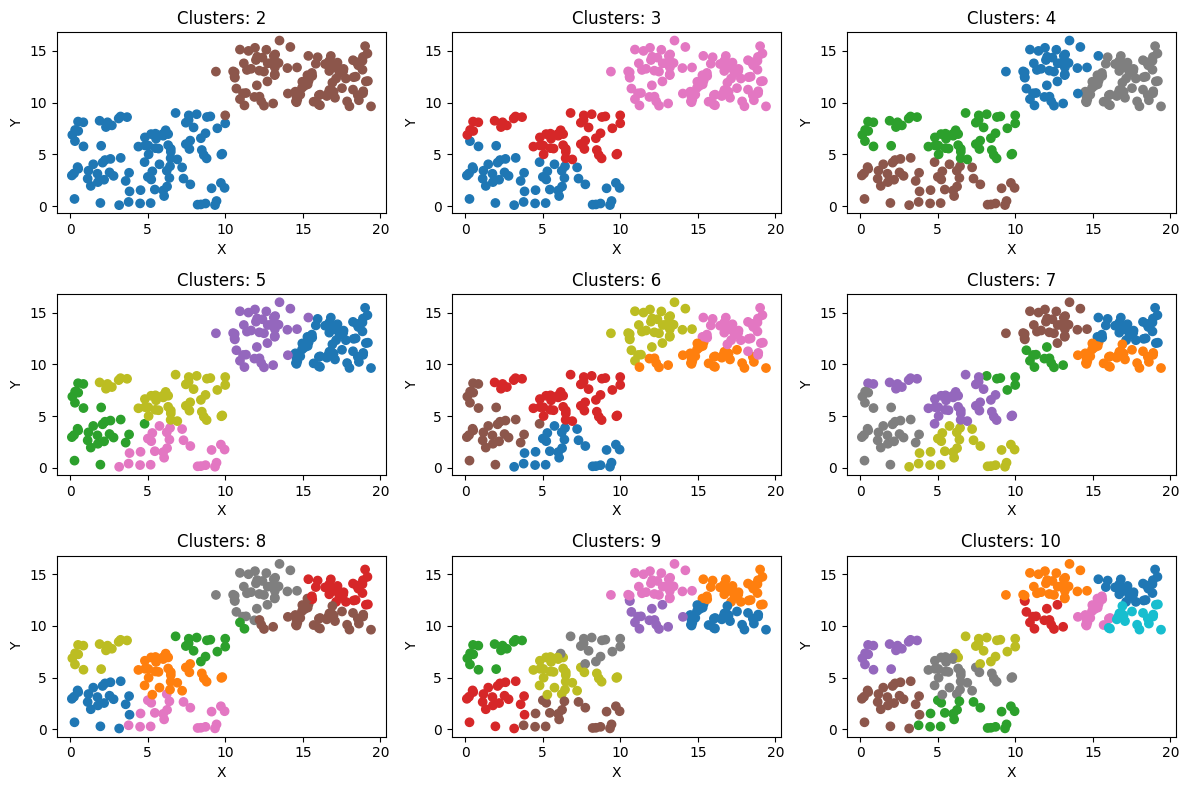

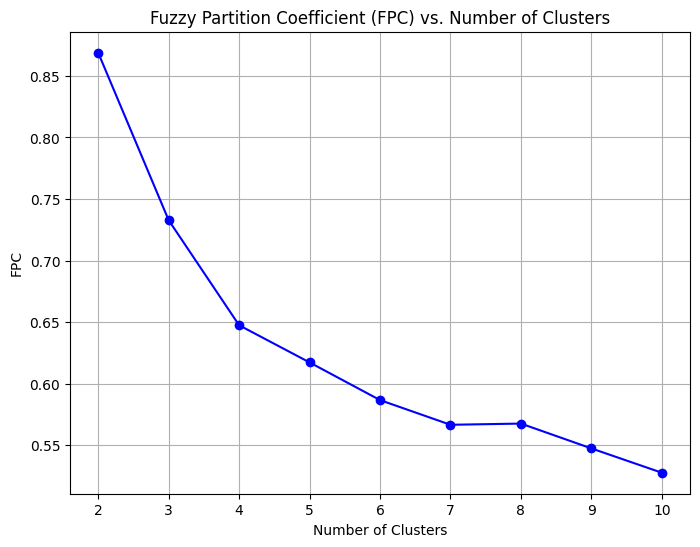

In [21]:
# Set the figure size
plt.figure(figsize=(12, 8))

# List to store Fuzzy Partition Coefficient (FPC) values
fpcs = []

# Define the grid size for subplots
grid_size = (3, 3)

# Loop over different numbers of clusters
for i, num_clusters in enumerate(range(2, 11), start=1):
    
    # Apply fuzzy c-means clustering
    center, membership, _, _, _, _, fpc = skfuzzy.cluster.cmeans(df_normalized_standard.T, num_clusters, m=2, error=0.005, maxiter=1000)

    # Determine the cluster membership for each data point
    cluster_membership = membership.argmax(axis=0)

    # Append FPC value to the list
    fpcs.append(fpc)

    # Create subplots
    plt.subplot(*grid_size, i)
    
    # Scatter plot with colored clusters
    plt.scatter(df['X'], df['Y'], c=plt.cm.tab10(cluster_membership / float(num_clusters)))
    
    # Set plot title and axis labels
    plt.title(f'Clusters: {num_clusters}')
    plt.xlabel('X')
    plt.ylabel('Y')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

# Plot FPC values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), fpcs, marker='o', linestyle='-', color='b')
plt.title('Fuzzy Partition Coefficient (FPC) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('FPC')
plt.grid(True)
plt.show()



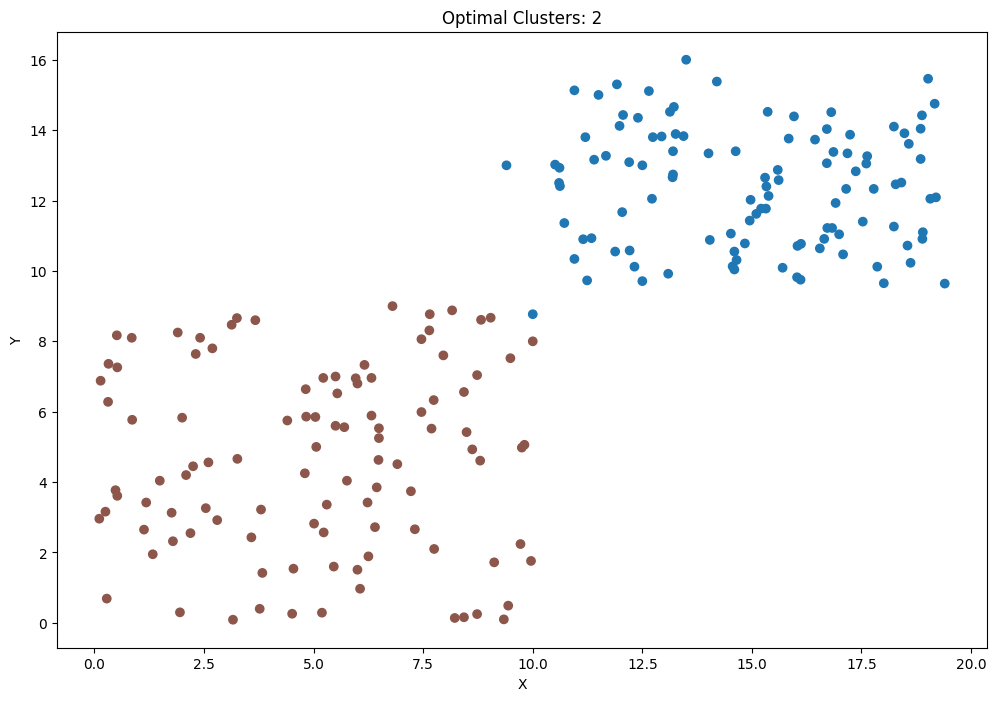

In [23]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Find the optimal number of clusters based on FPC
optimal_num_clusters = range(2, 11)[fpcs.index(max(fpcs))]

# Apply fuzzy c-means clustering with the optimal number of clusters
center, membership, _, _, _, _, fpc = skfuzzy.cluster.cmeans(df_normalized_standard.T, optimal_num_clusters, m=2, error=0.005, maxiter=1000)

# Determine the cluster membership for each data point
cluster_membership = membership.argmax(axis=0)

# Create scatter plot with colored clusters
plt.scatter(df['X'], df['Y'], c=plt.cm.tab10(cluster_membership / float(optimal_num_clusters)))

# Set plot title and axis labels
plt.title(f'Optimal Clusters: {optimal_num_clusters}')
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.show()

**Repeat for data2**

In [24]:
df = pd.read_csv("./data2.csv")
print(df)

            X         Y  Class
0   -0.842046  0.408155      0
1    0.096394 -0.852114      1
2   -0.964828  0.034454      0
3   -0.164699  0.817332      1
4    0.274231  0.756343      1
..        ...       ...    ...
295 -0.526197  0.815028      0
296  0.832952  0.086819      1
297 -0.900569 -0.555313      0
298 -0.534179 -0.513472      1
299 -0.949867 -0.258711      0

[300 rows x 3 columns]


In [25]:
# Features need to be normalized
feats = ['X', 'Y']

# Standardize the data
df_normalized_standard = df[feats].apply(lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten(), axis=0)

# Rename columns in the new DataFrame
df_normalized_standard.columns = feats

# Plot the data
print(df_normalized_standard)

            X         Y
0   -1.315522  0.649213
1    0.141025 -1.323862
2   -1.506091  0.064147
3   -0.264216  1.289819
4    0.417045  1.194334
..        ...       ...
295 -0.825294  1.286212
296  1.284232  0.146129
297 -1.406355 -0.859190
298 -0.837684 -0.793684
299 -1.482871 -0.394832

[300 rows x 2 columns]


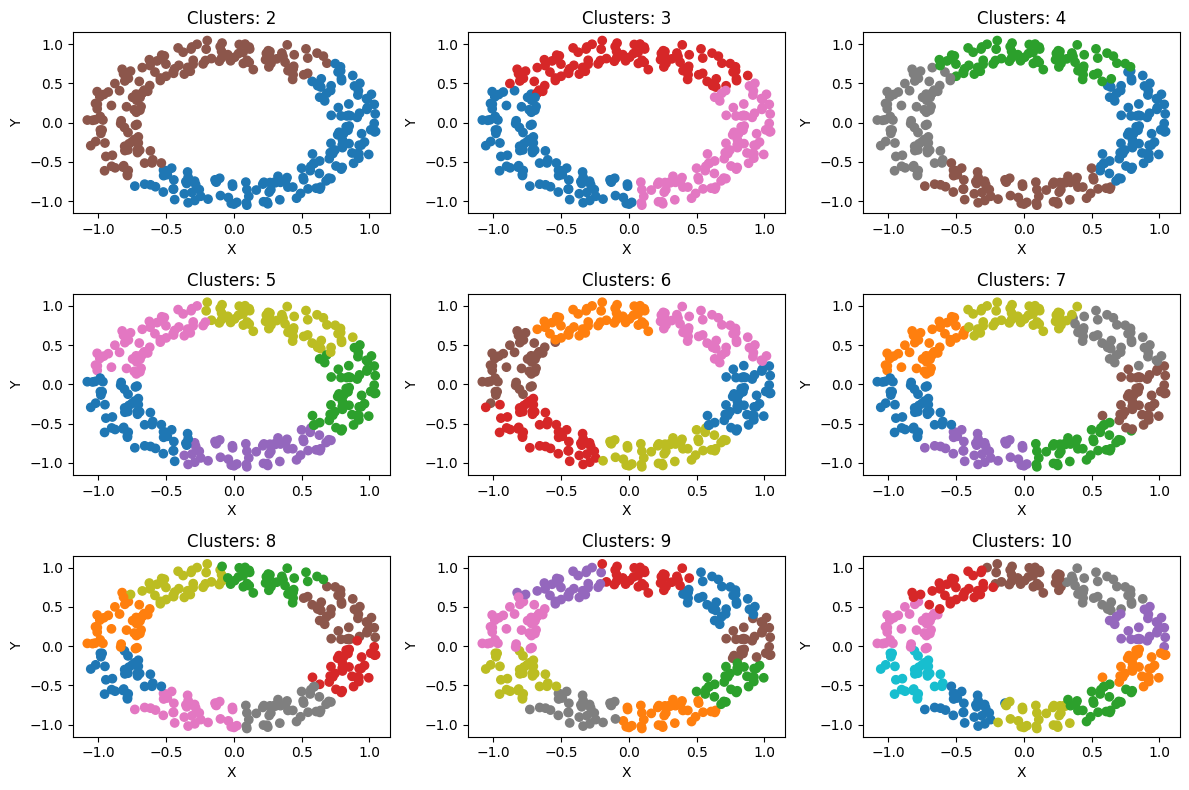

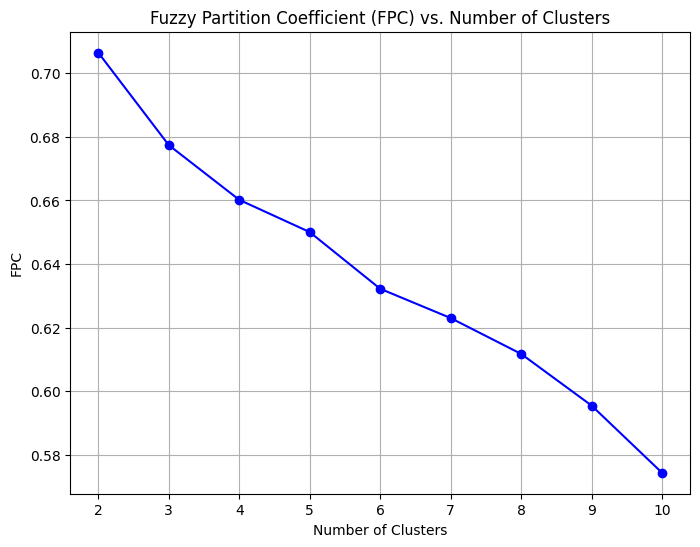

In [26]:
# Set the figure size
plt.figure(figsize=(12, 8))

# List to store Fuzzy Partition Coefficient (FPC) values
fpcs = []

# Define the grid size for subplots
grid_size = (3, 3)

# Loop over different numbers of clusters
for i, num_clusters in enumerate(range(2, 11), start=1):
    
    # Apply fuzzy c-means clustering
    center, membership, _, _, _, _, fpc = skfuzzy.cluster.cmeans(df_normalized_standard.T, num_clusters, m=2, error=0.005, maxiter=1000)

    # Determine the cluster membership for each data point
    cluster_membership = membership.argmax(axis=0)

    # Append FPC value to the list
    fpcs.append(fpc)

    # Create subplots
    plt.subplot(*grid_size, i)
    
    # Scatter plot with colored clusters
    plt.scatter(df['X'], df['Y'], c=plt.cm.tab10(cluster_membership / float(num_clusters)))
    
    # Set plot title and axis labels
    plt.title(f'Clusters: {num_clusters}')
    plt.xlabel('X')
    plt.ylabel('Y')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plots
plt.show()

# Plot FPC values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), fpcs, marker='o', linestyle='-', color='b')
plt.title('Fuzzy Partition Coefficient (FPC) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('FPC')
plt.grid(True)
plt.show()

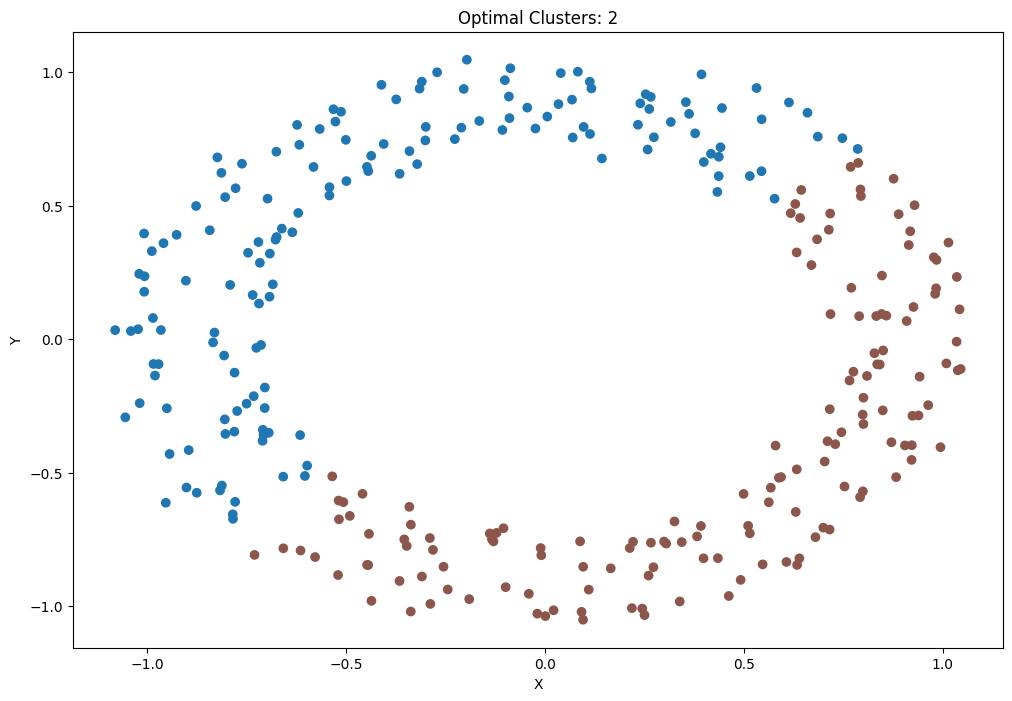

In [27]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Find the optimal number of clusters based on FPC
optimal_num_clusters = range(2, 11)[fpcs.index(max(fpcs))]

# Apply fuzzy c-means clustering with the optimal number of clusters
center, membership, _, _, _, _, fpc = skfuzzy.cluster.cmeans(df_normalized_standard.T, optimal_num_clusters, m=2, error=0.005, maxiter=1000)

# Determine the cluster membership for each data point
cluster_membership = membership.argmax(axis=0)

# Create scatter plot with colored clusters
plt.scatter(df['X'], df['Y'], c=plt.cm.tab10(cluster_membership / float(optimal_num_clusters)))

# Set plot title and axis labels
plt.title(f'Optimal Clusters: {optimal_num_clusters}')
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.show()